# 1.load liabararies

* load the labaraies that are importance
* import warinings to avoid from getting warinings
* 2. read files
* head,tail,shape,info(1.categories. 2. missing values. 3. outilers)

In [41]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
df = pd.read_csv("D:/Machine Learning/Data Wrangling and EDA/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Discover and visualize the data to gain insights

In [ ]:
## descride(skewed or not )
### Data expotary data anlysis(1.histgram,2. cat(barplot),3.pairplot/corr Matrix/Heatmape 4. latitude/longtitude ; map)
### latitude/longitude/map
* Mapping latitude and longitude coordinates on a map provides a visual representation of spatial data, enabling the exploration of geographic patterns and relationships.

<Axes: xlabel='longitude', ylabel='latitude'>

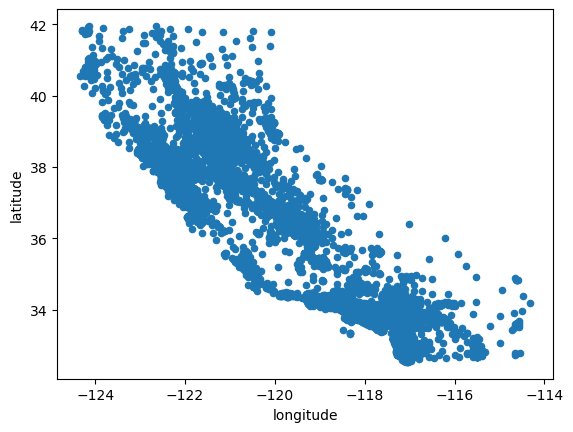

In [42]:
df.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

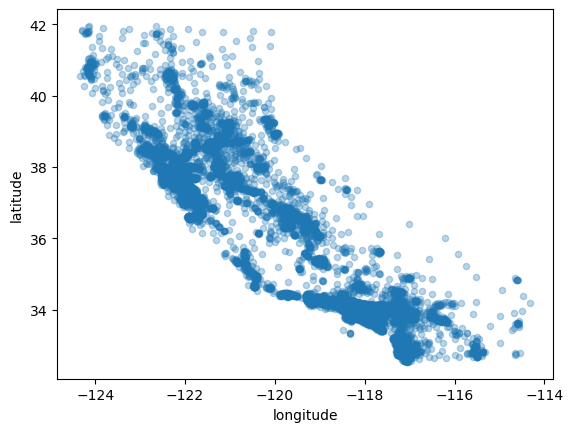

In [43]:
df.plot(kind="scatter",x="longitude",y="latitude", alpha=0.3)

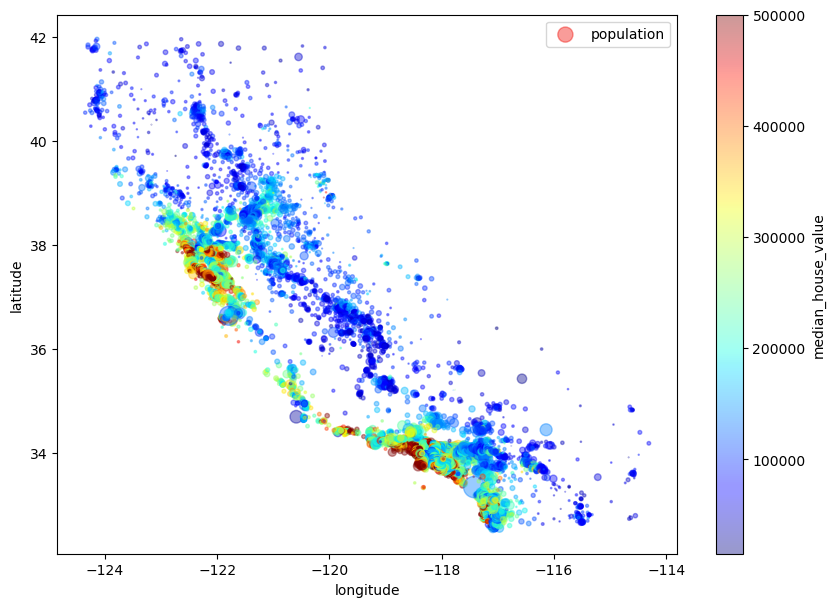

In [44]:
import matplotlib.pyplot as plt
df.plot(kind="scatter",x="longitude",y="latitude",
        alpha=0.4,
        s=df["population"]/150,
        label="population",
        figsize=(10,7),
        c = "median_house_value",
        cmap=plt.get_cmap("jet"),colorbar=True,
        sharex=False)
plt.legend()

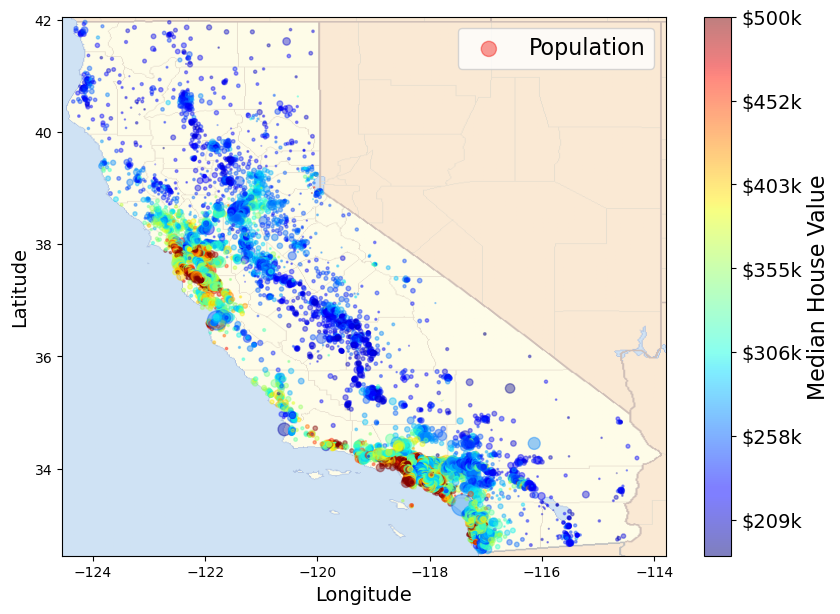

In [45]:
import os
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=df['population']/150, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [46]:
df.shape

(20640, 10)

In [47]:
 df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


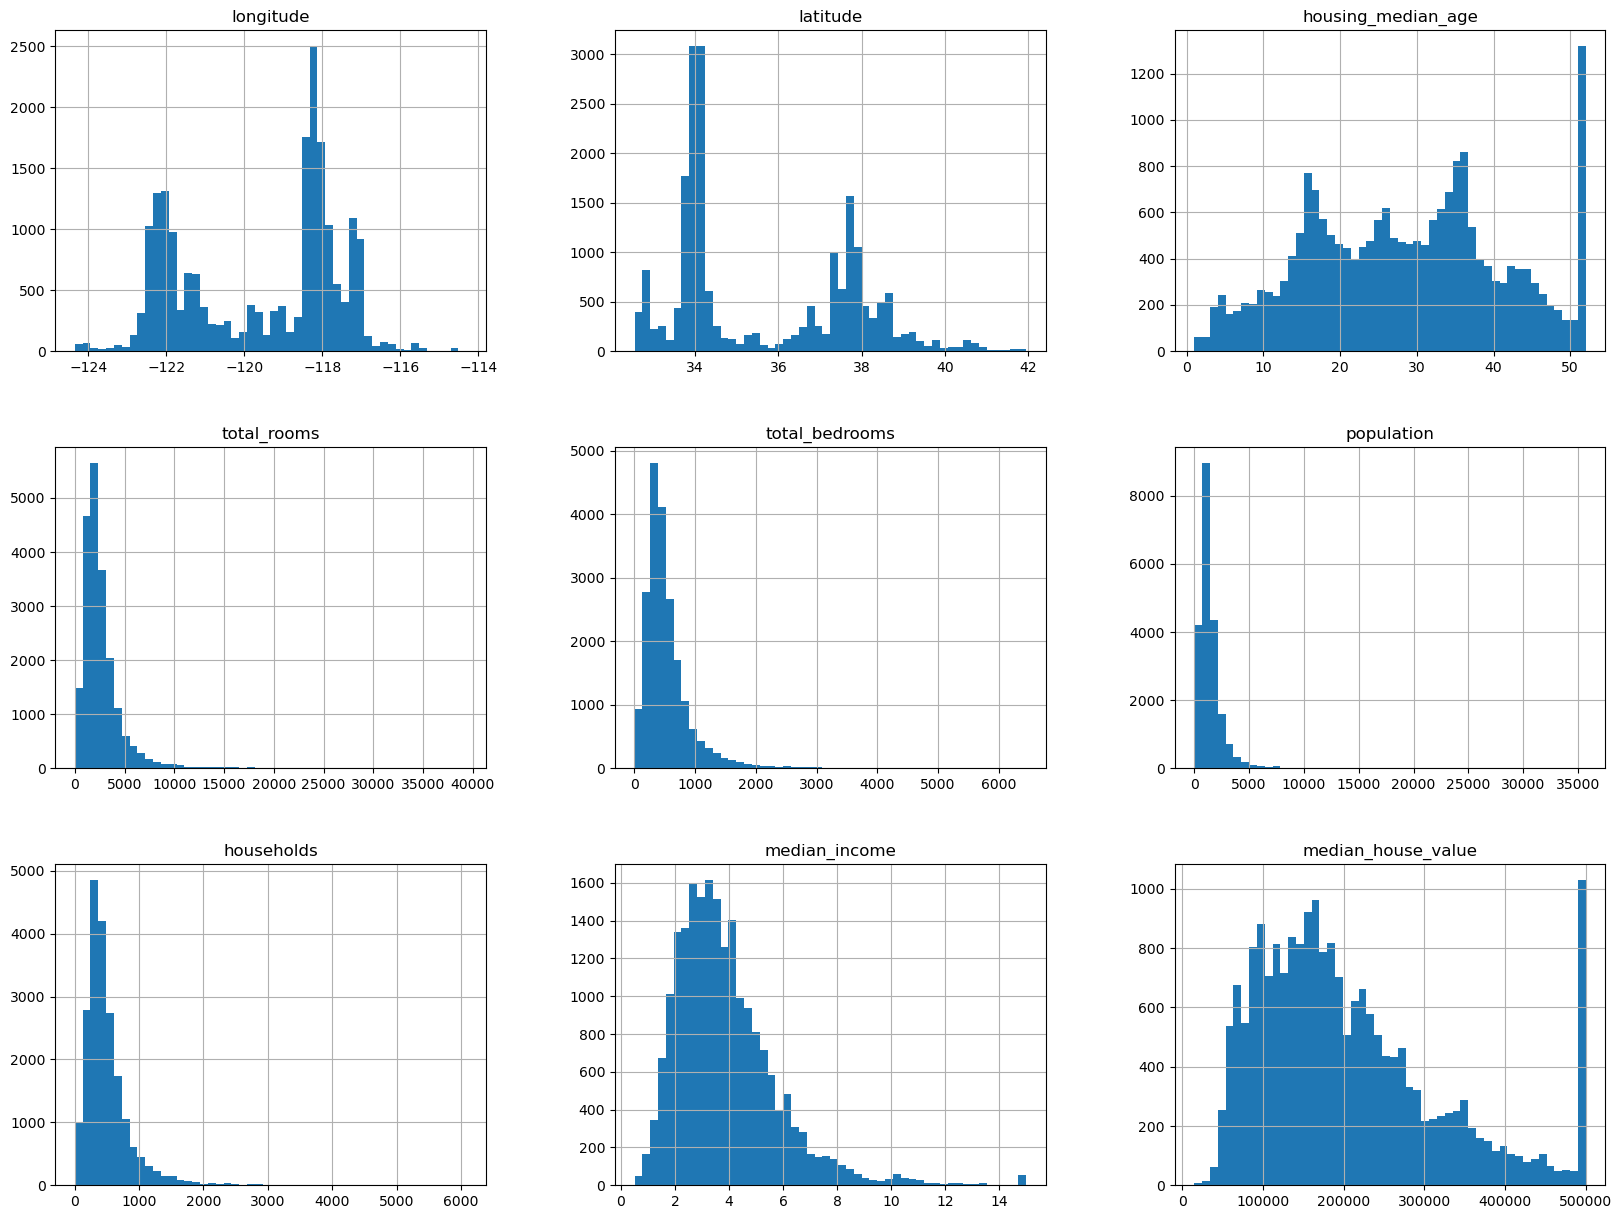

In [48]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

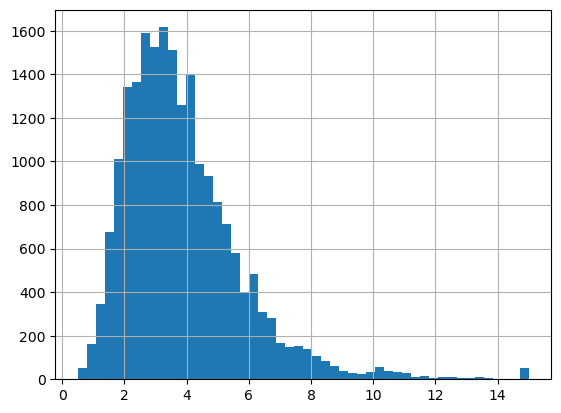

In [49]:
df["median_income"].hist(bins=50)

<Axes: >

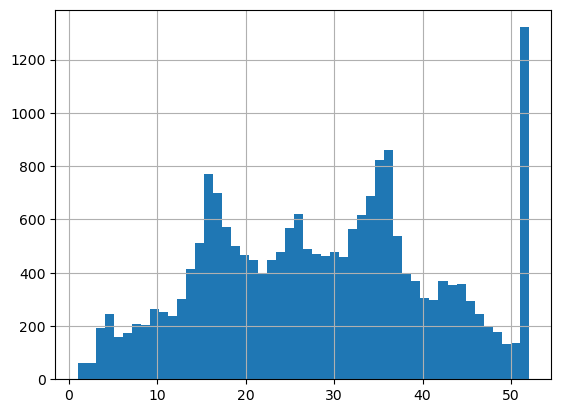

In [50]:
df["housing_median_age"].hist(bins=50)


<Axes: >

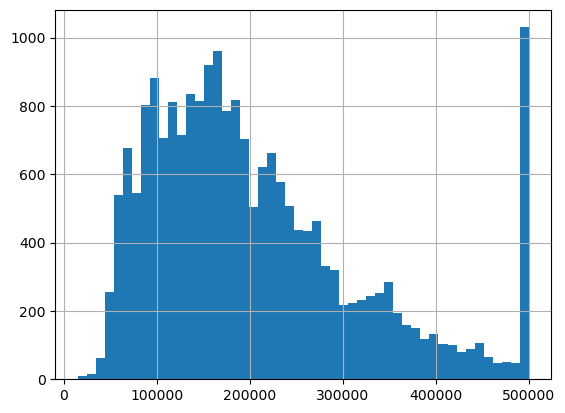

In [51]:
df["median_house_value"].hist(bins=50)

<Axes: >

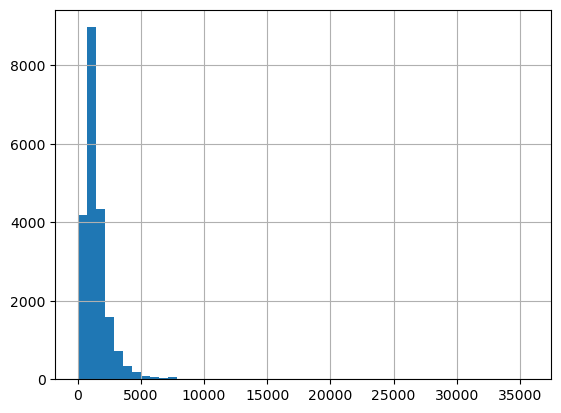

In [52]:
df["population"].hist(bins=50)

<Axes: >

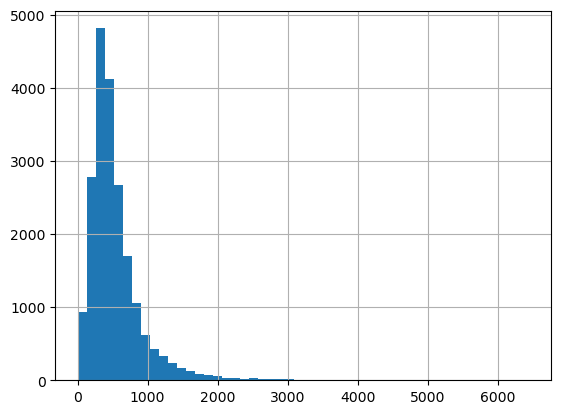

In [53]:
df["total_bedrooms"].hist(bins=50)

In [54]:
file=df.drop("ocean_proximity",axis=1)

In [55]:
file.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


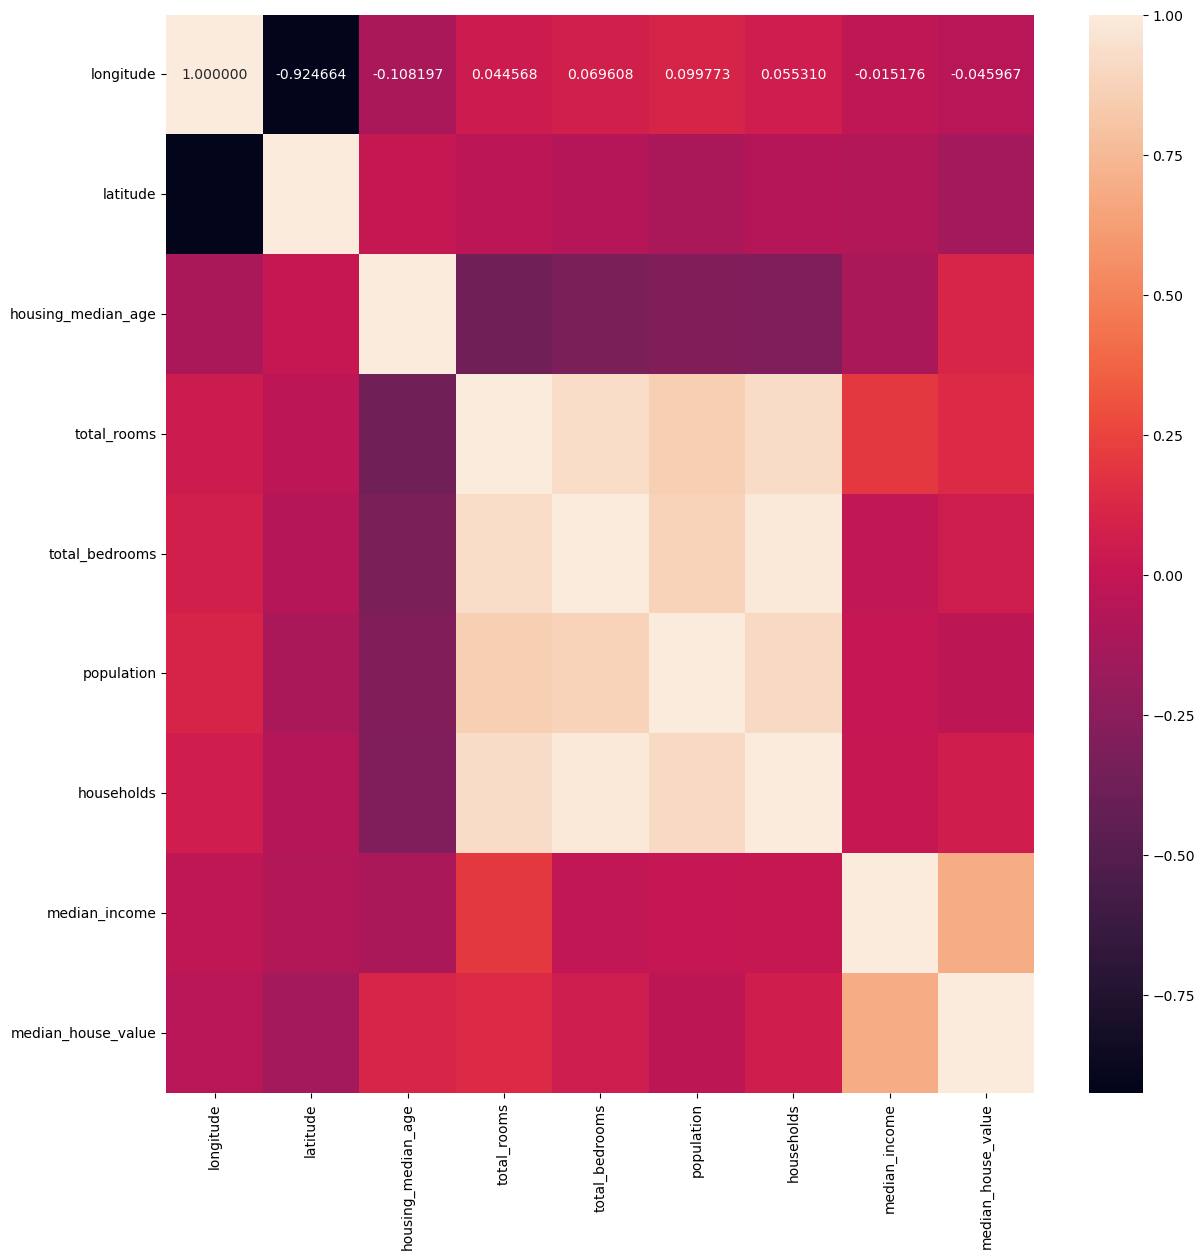

In [56]:
import seaborn as sns
plt.figure(figsize=(14,14))
sns.heatmap(file.corr(), annot=True,fmt="2f")
plt.show()

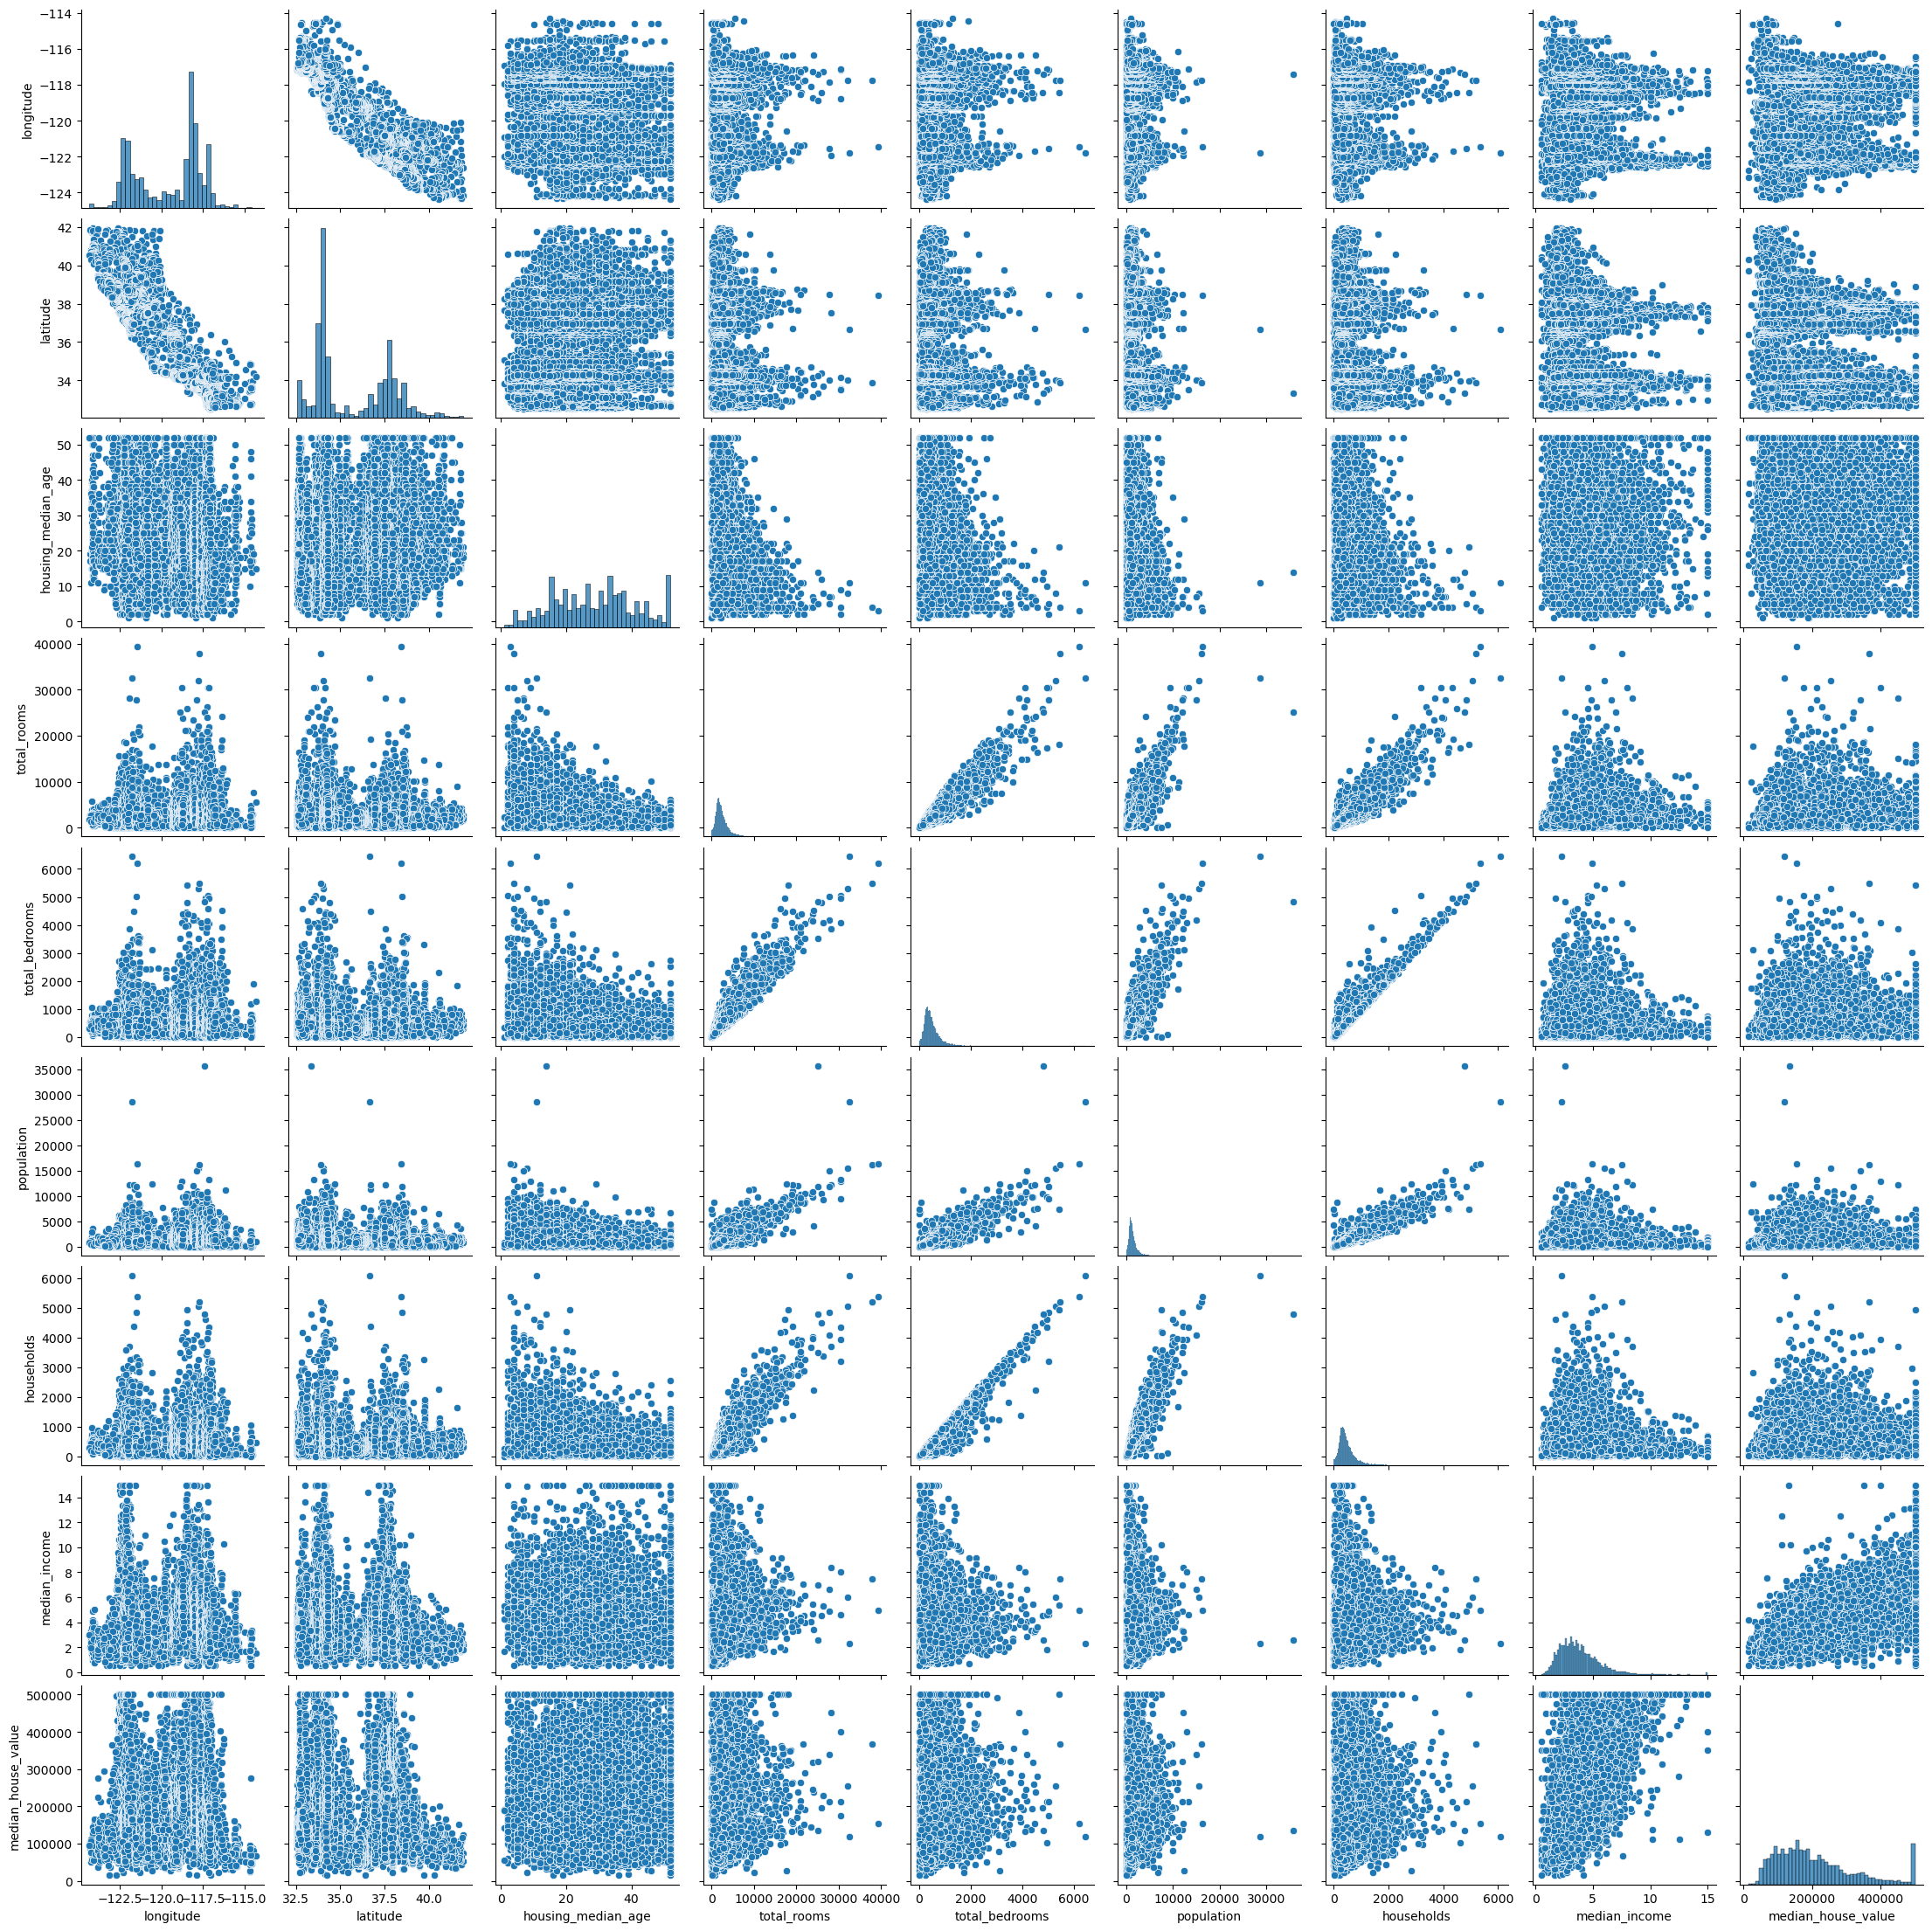

In [57]:
sns.pairplot(file)